In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
features = df.columns[:-1]
print(features)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


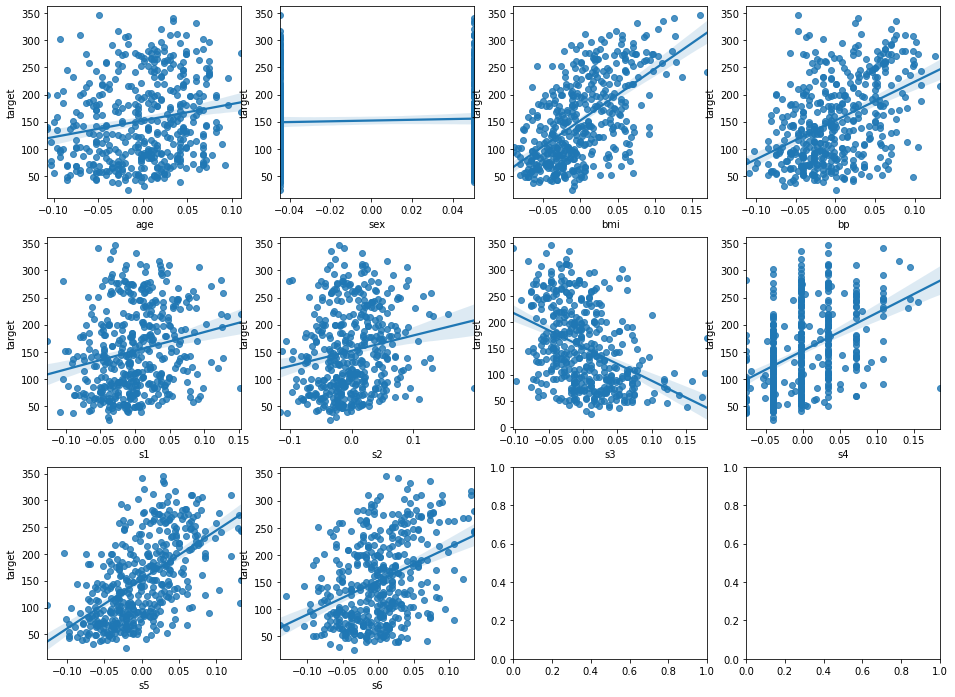

In [5]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,12))
for i, feature in enumerate(features):
    row, col = i//4, i%4
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

In [6]:
from sklearn.linear_model import LinearRegression

y = diabetes.target
for feature in diabetes.feature_names:
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X, y)
    r2 = lr.score(X, y)
    print(f'{feature}:\t{r2:.4f}')

age:	0.0353
sex:	0.0019
bmi:	0.3439
bp:	0.1949
s1:	0.0450
s2:	0.0303
s3:	0.1559
s4:	0.1853
s5:	0.3202
s6:	0.1463


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=2021
)

In [8]:
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
pred = lr.predict(X_test)

In [10]:
lr.score(X_test, y_test)

0.12182329052160201

In [15]:
lr.coef_

array([622.16835819])

In [16]:
lr.intercept_

150.91147064038952

In [11]:
weight, bias = lr.coef_[0], lr.intercept_
rss = lr._residues
weight, bias, rss

(622.16835818772, 150.91147064038952, 2066112.533595994)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred_dt = dtc.predict(X_test)

In [13]:
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)